# 1. Pre-Setup


## ⚠️ Turning off unneccessary warnings.


In [ ]:
import warnings                         # Mengimpor modul warnings
warnings.filterwarnings('ignore')       # Menyaring semua jenis warning agar tidak ditampilkan di output.

## 📚 Libraries Import

Importing library for importing data and preprocessing data.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sp

## 📊 Data Import

Using pandas to import the data from "Obesity prediction.csv" as a dataframe -> Matrix Like object.


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction") + "/Obesity prediction.csv"

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\ruchikakumbhar\obesity-prediction\versions\1/Obesity prediction.csv


In [7]:
df = pd.read_csv(path)
df.head(5)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

# 2. 🔍 Exploratory Data Analysis (EDA) dan Data Preprocessing


## ℹ️ Data General Info

General Data Information including data types, null value counts, and the statistical info for each column.


### Columns and Data Types


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [10]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [11]:
obesity_dist = df['Obesity'].value_counts()
obesity_dist

Obesity
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### Missing Data


In [12]:
print(df.isnull().sum())
print()
print(f'Total missing data: {df.isnull().sum().sum()}')

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

Total missing data: 0


There is no missing data in the dataset.


## 🔁 Duplicate Data

Checking for duplicate rows, and handling them. Because this is a dataset of people with Obesity category, then duplicate data does not matter because we are not accounting demography or the occurence of the same condition twice for each person, so we can remove the duplicate.


### Checking for Duplicate Data


In [13]:
print(f"Duplicate row count: {df.duplicated().sum()}")

Duplicate row count: 24


In [14]:
print("Duplicated Data:")
indices = [i for i in df.duplicated().index if df.duplicated()[i]]
print(df.loc[indices])

Duplicated Data:
     Gender   Age  Height  Weight family_history FAVC  FCVC  NCP        CAEC  \
98   Female  21.0    1.52    42.0             no   no   3.0  1.0  Frequently   
106  Female  25.0    1.57    55.0             no  yes   2.0  1.0   Sometimes   
174    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
179    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
184    Male  21.0    1.62    70.0             no  yes   2.0  1.0          no   
209  Female  22.0    1.69    65.0            yes  yes   2.0  3.0   Sometimes   
309  Female  16.0    1.66    58.0             no   no   2.0  1.0   Sometimes   
460  Female  18.0    1.62    55.0            yes  yes   2.0  3.0  Frequently   
467    Male  22.0    1.74    75.0            yes  yes   3.0  3.0  Frequently   
496    Male  18.0    1.72    53.0            yes  yes   2.0  3.0   Sometimes   
527  Female  21.0    1.52    42.0             no  yes   3.0  1.0  Frequently   
659  Female  21.0    1.

### Removing Duplicate Data


In [15]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2082,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2083,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2084,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2085,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [16]:
print(f"Row count after dropping duplicates: {df.shape[0]}")

Row count after dropping duplicates: 2087


## 🔴 Outliers

Checking for rows with extreme numerical data points


### Checking for Continuous Data


In [17]:
# countinuous_columns = [attr for attr in df.dtypes.index if df.dtypes[attr] == 'int64' or df.dtypes[attr] == 'float64']
continuous_columns = ['Age', 'Height', 'Weight']
print(f"Continuous Columns: {continuous_columns}")

Continuous Columns: ['Age', 'Height', 'Weight']


In [18]:
continuous_indices = [i for i in range(len(df.columns.values)) if df.columns.values[i] in continuous_columns]
continuous_df = df.iloc[:, continuous_indices]
continuous_df

,Age,Height,Weight
0,21.000000,1.620000,64.000000
1,21.000000,1.520000,56.000000
2,23.000000,1.800000,77.000000
3,27.000000,1.800000,87.000000
4,22.000000,1.780000,89.800000
...,...,...,...
2082,20.976842,1.710730,131.408528
2083,21.982942,1.748584,133.742943
2084,22.524036,1.752206,133.689352
2085,24.361936,1.739450,133.346641


### Continuous Data Distributions


#### Distributions Plot


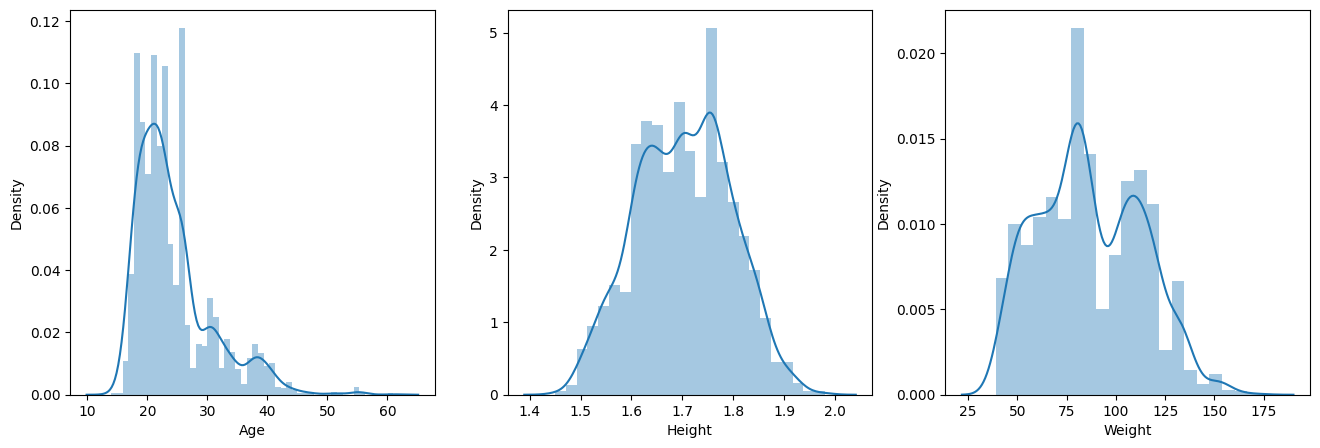

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(continuous_df['Age'])
plt.subplot(1,3,2)
sns.distplot(continuous_df['Height'])
plt.subplot(1,3,3)
sns.distplot(continuous_df['Weight'])
plt.show()

#### Q-Q Plot


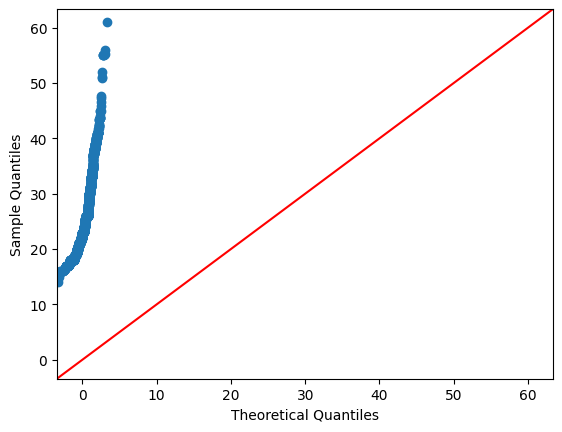

In [20]:
sm.qqplot(continuous_df['Age'], line='45')
plt.show()

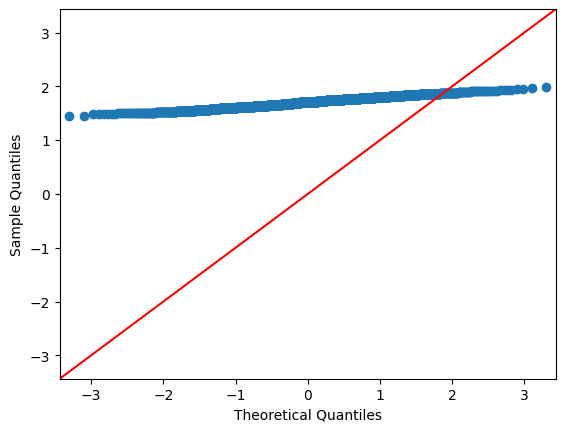

In [21]:
sm.qqplot(continuous_df['Height'], line='45')
plt.show()

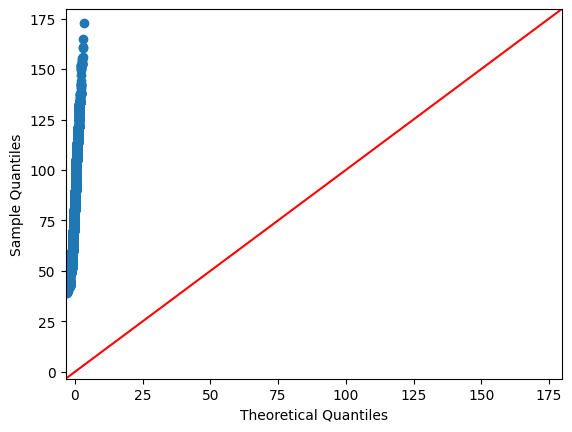

In [22]:
sm.qqplot(continuous_df['Weight'], line='45')
plt.show()

#### Skewness and Kurtosis


In [23]:
print("Age")
print(f"Kurtosis: {sp.kurtosis(continuous_df['Age'])}")
print(f"Skewness: {sp.skew(continuous_df['Age'])}")
print("Height")
print(f"Kurtosis: {sp.kurtosis(continuous_df['Height'])}")
print(f"Skewness: {sp.skew(continuous_df['Height'])}")
print("Weight")
print(f"Kurtosis: {sp.kurtosis(continuous_df['Weight'])}")
print(f"Skewness: {sp.skew(continuous_df['Weight'])}")

Age
Kurtosis: 2.758190274759725
Skewness: 1.5132163009104738
Height
Kurtosis: -0.5573653902930622
Skewness: -0.02472522704948489
Weight
Kurtosis: -0.7066627339474816
Skewness: 0.24172823035894342


#### Shapiro-Wilk Test


In [24]:
stat, p = sp.shapiro(continuous_df['Age'])
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.868, p=0.0000


In [25]:
stat, p = sp.shapiro(continuous_df['Height'])
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.993, p=0.0000


In [26]:
stat, p = sp.shapiro(continuous_df['Weight'])
print('Statistics=%.3f, p=%.4f' % (stat, p))

Statistics=0.977, p=0.0000


#### Result


Age: Heavily Right-Skewed. -> IQR<br>
Height: Slightly Left-Skewed. -> Percentile-Based<br>
Weight: Slightly Right-Skewed. -> Percentile-Based


### Outliers Detection


In [27]:
q1, q3 = df['Age'].quantile([0.25, 0.75]).values
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

age_bounds = (df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)
print(f"Age outlier count: {age_bounds.count() - age_bounds.sum()}")

Age outlier count: 167


In [28]:
p1, p99 = df['Height'].quantile([0.01, 0.99]).values
height_bounds = (df['Height'] >= p1) & (df['Height'] <= p99)
print(f"Height outlier count: {height_bounds.count() - height_bounds.sum()}")

Height outlier count: 30


In [29]:
p1, p99 = df['Weight'].quantile([0.01, 0.99]).values
weight_bounds = (df['Weight'] >= p1) & (df['Weight'] <= p99)
print(f"Weight outlier count: {weight_bounds.count() - weight_bounds.sum()}")

Weight outlier count: 42


In [30]:
df_without_outliers = df.loc[age_bounds & height_bounds & weight_bounds]
print(f"Outlier portion: {round(((df.shape[0] - df_without_outliers.shape[0])/df.shape[0])*100, 3)}%")

Outlier portion: 11.452%


In [31]:
print(f"Before outlier removal count: {df.shape[0]}")
print(f"After outlier removal count: {df_without_outliers.shape[0]}")

Before outlier removal count: 2087
After outlier removal count: 1848


In [32]:
df = df.loc[age_bounds & height_bounds & weight_bounds]
df.reset_index(drop=True, inplace=True)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
1844,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
1845,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
1846,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Results


The dataset has around 11.4% outliers, all of them from Age, Height, and Weight. Because the outlier is more than 10% and they come from, theoritically, most contributing features, the decision is to not remove them, but let them be because they are most likely natural outliers.


## Data Balance


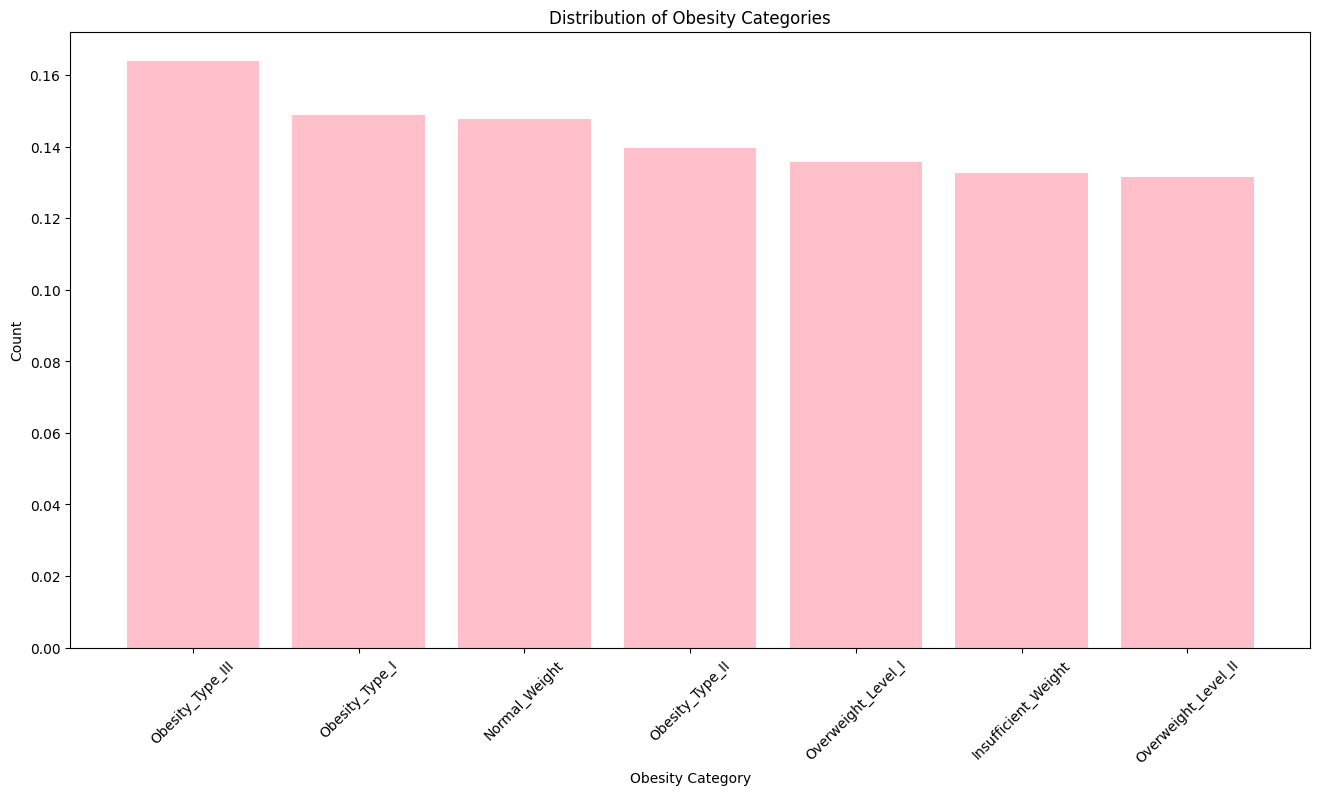

In [33]:
obesity_dist = df['Obesity'].value_counts(normalize=True)

plt.figure(figsize=(16, 8))
plt.bar(obesity_dist.index, obesity_dist.values, color='pink')

plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.title('Distribution of Obesity Categories')
plt.xticks(rotation=45)

plt.show()

In [34]:
print(obesity_dist)

Obesity
Obesity_Type_III       0.163961
Obesity_Type_I         0.148810
Normal_Weight          0.147727
Obesity_Type_II        0.139610
Overweight_Level_I     0.135823
Insufficient_Weight    0.132576
Overweight_Level_II    0.131494
Name: proportion, dtype: float64


In [35]:
print(f"Max: {round(obesity_dist.max(), 3)}")
print(f"Min: {round(obesity_dist.min(), 3)}")

Max: 0.164
Min: 0.131


The attribute proportions are around ~0.128-10.168, which is balanced


# 3. 🎨 Features Engineering


## 🔢 Data Encoding


### Determining Column Types


There are 2 main types of data, Numerical and Categorical.<br>
For numerical data, there are discrete and continuous data.<br>
For categorical data, there are ordinal and nominal data.


In [36]:
continuous_column_names = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']
discrete_column_names = ['FCVC', 'NCP']
nominal_column_names = ['Gender', 'family_history', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
ordinal_column_names = ['CAEC', 'CALC']
label = ['Obesity'] # Ordinal

### Ordinal Data

There are two Ordinal Columns: 'CAEC', and 'CALC'.


In [37]:
print(f"CAEC Unique Values: {df['CAEC'].unique()}")
print(f"CALC Unique Values: {df['CALC'].unique()}")

CAEC Unique Values: ['Sometimes' 'Frequently' 'Always' 'no']
CALC Unique Values: ['no' 'Sometimes' 'Frequently' 'Always']


It can be seen that both CAEC and CALC have the same unique values with both of them having ordinal data, which means each has a ranking of each own with evenly spaced category -> Ordinal Encoder.


In [38]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df[ordinal_column_names] = ordinal_encoder.fit_transform(df[ordinal_column_names])
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,2.0,no,2.000000,no,0.000000,1.000000,3.0,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,2.0,yes,3.000000,yes,3.000000,0.000000,2.0,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,2.0,no,2.000000,no,2.000000,1.000000,1.0,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,2.0,no,2.000000,no,2.000000,0.000000,1.0,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,2.0,no,2.000000,no,0.000000,0.000000,2.0,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,2.0,no,1.728139,no,1.676269,0.906247,2.0,Public_Transportation,Obesity_Type_III
1844,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,2.0,no,2.005130,no,1.341390,0.599270,2.0,Public_Transportation,Obesity_Type_III
1845,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,2.0,no,2.054193,no,1.414209,0.646288,2.0,Public_Transportation,Obesity_Type_III
1846,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,2.0,no,2.852339,no,1.139107,0.586035,2.0,Public_Transportation,Obesity_Type_III


### Nominal Data


In [39]:
df[nominal_column_names] = ordinal_encoder.fit_transform(df[nominal_column_names])
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,Normal_Weight
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,Normal_Weight
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,Normal_Weight
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,Overweight_Level_I
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,Obesity_Type_III
1844,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,Obesity_Type_III
1845,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,Obesity_Type_III
1846,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,Obesity_Type_III


### Label


In [40]:
target_labels = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6,
}

In [41]:
df['Obesity'] = df['Obesity'].replace(target_labels)
df

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0.0,21.000000,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,0.000000,1.000000,3.0,3.0,1
1,0.0,21.000000,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.000000,1.0,3.000000,0.000000,2.0,3.0,1
2,1.0,23.000000,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.000000,0.0,2.000000,1.000000,1.0,3.0,1
3,1.0,27.000000,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.000000,0.0,2.000000,0.000000,1.0,4.0,2
4,1.0,22.000000,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.000000,0.0,0.000000,0.000000,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0.0,20.976842,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,1.728139,0.0,1.676269,0.906247,2.0,3.0,6
1844,0.0,21.982942,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.005130,0.0,1.341390,0.599270,2.0,3.0,6
1845,0.0,22.524036,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.054193,0.0,1.414209,0.646288,2.0,3.0,6
1846,0.0,24.361936,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,2.852339,0.0,1.139107,0.586035,2.0,3.0,6


## 📋 Features Selection


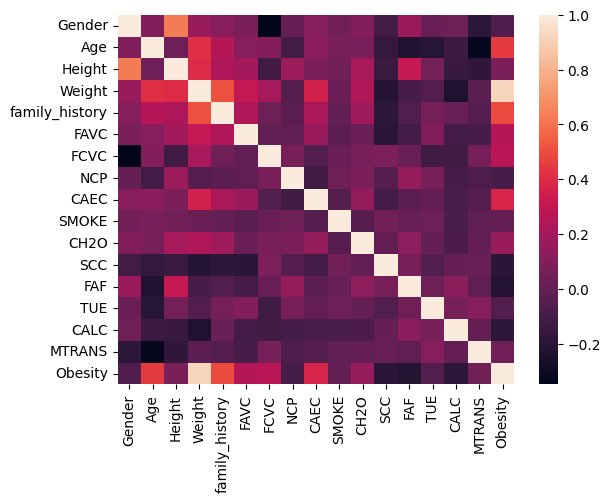

In [42]:
sns.heatmap(df.corr(method="spearman"))
plt.show()

In [43]:
data_corr = df.corr()
[(col, row) for col in data_corr.columns for row in data_corr.index if data_corr.loc[col, row] > 0.6 and col != row and col != 'Obesity' and row != 'Obesity']

[('Gender', 'Height'), ('Height', 'Gender')]

In [44]:
print(f"Correlation between Gender and Obesity: {abs(data_corr['Gender']['Obesity'])}")
print(f"Correlation between Height and Obesity: {abs(data_corr['Height']['Obesity'])}")

Correlation between Gender and Obesity: 0.05864169648193699
Correlation between Height and Obesity: 0.08245851903469502


# 4. ⚙️ Model Training

## 📝 Evaluation


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, auc

def print_eval(model, X_train, X_test, y_train, y_test, df_X, df_y, cv=5, multi_class='ovo', average='macro'):
    print("Training Accuracy:", model.score(X_train, y_train))
    print("Test Accuracy:", model.score(X_test, y_test))
    
    scores = cross_val_score(model, df_X, df_y, cv=cv)
    print("Cross Validation Scores:", scores)
    print("Average CV Score:", scores.mean())

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_labels = np.unique(y_train)
    test_labels = np.unique(y_test)

    print(f'Train Confusion Matrix: {confusion_matrix(y_train, y_train_pred, labels=train_labels)}')
    print(f'Test Confusion Matrix: {confusion_matrix(y_test, y_test_pred, labels=test_labels)}')

    print(f'Train Recall Score: {recall_score(y_train, y_train_pred, labels=train_labels, average=average)}')
    print(f'Test Recall Score: {recall_score(y_test, y_test_pred, labels=test_labels, average=average)}')

    print(f'Train Precision Score: {precision_score(y_train, y_train_pred, labels=train_labels, average=average)}')
    print(f'Test Precision Score: {precision_score(y_test, y_test_pred, labels=test_labels, average=average)}')

    print(f'Train F1 Score: {f1_score(y_train, y_train_pred, labels=train_labels, average=average)}')
    print(f'Test F1 Score: {f1_score(y_test, y_test_pred, labels=test_labels, average=average)}')

## 💡 Model


In [46]:
df_X = df.drop(columns=['Gender', 'Obesity'])
df_y = df['Obesity']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.33, random_state=42
)
df_X.shape

(1848, 15)

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [52]:
print_eval(clf, X_train, X_test, y_train, y_test, df_X, df_y)

Training Accuracy: 0.851373182552504
Test Accuracy: 0.7901639344262295
Cross Validation Scores: [0.6        0.84864865 0.84324324 0.80487805 0.87804878]
Average CV Score: 0.7949637442320368
Train Confusion Matrix: [[153   7   0   0   0   0   0]
 [  5 169   6   8   1   0   0]
 [  0  27 104  33   5   0   0]
 [  0  17   6 130  17   1   0]
 [  0   7   0  22 131  10   6]
 [  0   1   0   2   1 161   2]
 [  0   0   0   0   0   0 206]]
Test Confusion Matrix: [[72 13  0  0  0  0  0]
 [ 1 77  3  3  0  0  0]
 [ 0 19 36 22  5  0  0]
 [ 0  6  6 50 10  0  0]
 [ 0  3  1 19 62 12  2]
 [ 0  0  0  2  0 88  1]
 [ 0  0  0  0  0  0 97]]
Train Recall Score: 0.8477769236855387
Test Recall Score: 0.7843557025971455
Train Precision Score: 0.8595179308200253
Test Precision Score: 0.7996400824178117
Train F1 Score: 0.8479097797980867
Test F1 Score: 0.777469962094436


# 5. 🎯 Hyperparameter Tuning


In [67]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=10)  # Select the top 10 features
X_rfe = rfe.fit_transform(df_X, df_y)

In [68]:
rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test = train_test_split(
    X_rfe, df_y, test_size=0.33, random_state=42
)

In [ ]:
rfe_clf = RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                        n_estimators=175, random_state=0)
rfe_clf.fit(rfe_X_train, rfe_y_train)

print_eval(rfe_clf, rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test, X_rfe, df_y)

In [ ]:
hyperparameters = {
  'n_estimators': np.linspace(100, 500, 17, dtype=int),
  'criterion': ["gini", "entropy"],
  'max_depth': np.linspace(1, 10, 10, dtype=int),
  'min_samples_split': np.linspace(1, 6, 6, dtype=int),
  'min_samples_leaf': np.linspace(1, 6, 6, dtype=int),
  'max_features': ["sqrt", "log2"]
}
hyperparameters

In [87]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(rfe_clf, hyperparameters, verbose=2, n_jobs=-1)
grid_search_cv.fit(rfe_X_train, rfe_y_train)
print(grid_search_cv.best_estimator_)

Fitting 5 folds for each of 2448 candidates, totalling 12240 fits
RandomForestClassifier(criterion='entropy', max_depth=np.int64(1),
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2),
                       n_estimators=np.int64(500), random_state=0)


In [88]:
rfe_tuned_clf = grid_search_cv.best_estimator_

rfe_tuned_clf.fit(rfe_X_train, rfe_y_train)

RandomForestClassifier(criterion='entropy', max_depth=np.int64(1),
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2),
                       n_estimators=np.int64(500), random_state=0)

In [86]:
print_eval(rfe_tuned_clf, rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test, X_rfe, df_y)

Training Accuracy: 0.5008077544426495
Test Accuracy: 0.5098360655737705
Cross Validation Scores: [0.378378 0.483784 0.6      0.550136 0.539295]
Average CV Score: 0.5103186112942211
Train Confusion Matrix: [[ 11 124  16   1   0   0   8]
 [  7 116  10  15   0   0  41]
 [  0  58  66  30   0   0  15]
 [  0  40  45  66   0   3  17]
 [  0  41  31  28  13  22  41]
 [  0   1   0   2   0 142  22]
 [  0   0   0   0   0   0 206]]
Test Confusion Matrix: [[ 4 66  7  0  0  0  8]
 [ 4 60  3  5  0  0 12]
 [ 0 23 30 20  0  0  9]
 [ 0 16 16 31  0  1  8]
 [ 0 21 15 18  8 16 21]
 [ 0  0  0  1  0 81  9]
 [ 0  0  0  0  0  0 97]]
Train Recall Score: 0.4833095868538936
Test Recall Score: 0.5040959604036054
Train Precision Score: 0.6018415677180557
Test Precision Score: 0.5823490309487533
Train F1 Score: 0.4390882482252228
Test F1 Score: 0.442051729518457


In [74]:
from sklearn.metrics import log_loss

max_depth = np.linspace(1, 20, 20, dtype=np.int64)
train_loss = []
test_loss = []

for i in range(1, 20 + 1):
    rfe_tuned_clf = RandomForestClassifier(criterion='entropy', max_depth=i,
                        min_samples_leaf=np.int64(1),
                        min_samples_split=np.int64(2),
                        max_features='sqrt',
                        n_estimators=np.int64(500), random_state=0)
    
    rfe_tuned_clf.fit(rfe_X_train, rfe_y_train)

    train_loss.append(log_loss(rfe_y_train, rfe_tuned_clf.predict_proba(rfe_X_train)))
    test_loss.append(log_loss(rfe_y_test, rfe_tuned_clf.predict_proba(rfe_X_test)))

train_loss
test_loss

[1.5991235792569114,
 1.2892948134220685,
 1.0367140063462859,
 0.8268033031932974,
 0.6522029594592423,
 0.524739802196775,
 0.42249792494857574,
 0.35389745672904316,
 0.3070772135690407,
 0.2821680123518501,
 0.26989943959664264,
 0.2642245990271339,
 0.26366504192704343,
 0.2616440969120224,
 0.262360585635002,
 0.26268875800589986,
 0.26192170096735573,
 0.26209046295012667,
 0.2620923532250884,
 0.2620923532250884]

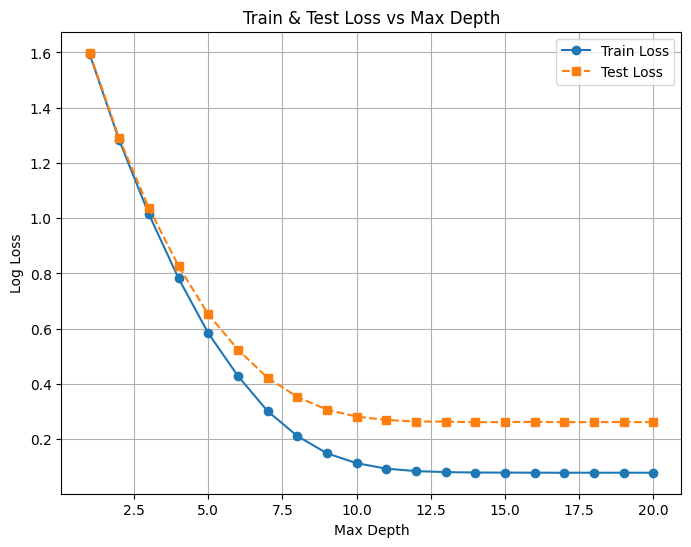

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(max_depth, train_loss, label="Train Loss", marker='o', linestyle='-')
plt.plot(max_depth, test_loss, label="Test Loss", marker='s', linestyle='--')

plt.xlabel("Max Depth")
plt.ylabel("Log Loss")
plt.title("Train & Test Loss vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()

In [89]:
rfe_tuned_clf = RandomForestClassifier(criterion='entropy', max_depth=np.int64(12),
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2),
                       max_features='sqrt',
                       n_estimators=np.int64(500), random_state=0)

rfe_tuned_clf.fit(rfe_X_train, rfe_y_train)

RandomForestClassifier(criterion='entropy', max_depth=np.int64(12),
                       min_samples_leaf=np.int64(1),
                       min_samples_split=np.int64(2),
                       n_estimators=np.int64(500), random_state=0)

In [90]:
print_eval(rfe_tuned_clf, rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test, X_rfe, df_y)

Training Accuracy: 1.0
Test Accuracy: 0.9524590163934427
Cross Validation Scores: [0.8      0.986486 0.983784 0.98103  0.98103 ]
Average CV Score: 0.9464659781732954
Train Confusion Matrix: [[160   0   0   0   0   0   0]
 [  0 189   0   0   0   0   0]
 [  0   0 169   0   0   0   0]
 [  0   0   0 171   0   0   0]
 [  0   0   0   0 176   0   0]
 [  0   0   0   0   0 167   0]
 [  0   0   0   0   0   0 206]]
Test Confusion Matrix: [[79  6  0  0  0  0  0]
 [ 1 80  2  1  0  0  0]
 [ 0  8 70  4  0  0  0]
 [ 0  1  2 68  1  0  0]
 [ 0  0  0  1 96  1  1]
 [ 0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0 97]]
Train Recall Score: 1.0
Test Recall Score: 0.9499418096876592
Train Precision Score: 1.0
Test Precision Score: 0.9518696004031713
Train F1 Score: 1.0
Test F1 Score: 0.949910343380321


# 6. 🚀 Model Deployment


In [78]:
import pickle

filename = "model.pkl"
pickle.dump(rfe_tuned_clf, open(filename, 'wb'))